In [1]:
from imports import *
import wrangle as wr
df = pd.read_csv('Hotel_Reviews.csv')
df = wr.wrangle_hotel(use_cache=True)



df.info()
df.head()

Using cached csv file...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   month_name                                  515738 non-null  object 
 1   month                                       515738 non-null  int64  
 2   year                                        515738 non-null  int64  
 3   day_name                                    515738 non-null  object 
 4   day                                         515738 non-null  int64  
 5   quarter                                     515738 non-null  int64  
 6   hotel_name                                  515738 non-null  object 
 7   street                                      515738 non-null  object 
 8   city                                        515738 non-null  object 
 9   zip_code                                    5

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma
0,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2.0,group,4,7.5,passive,730,-0.1027,-0.1027,54,39,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimmig pool ot opeed therefore coul...,first day swimmig pool ot ope therefor could o...,first day swimmig pool ot opeed therefore coul...,The hotel was clean and accessible,hotel clean accessible,hotel clean access,hotel clean accessible
1,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,France,48.877249,2.354304,125,8.6,853,United Kingdom,leisure,2.0,group,10,8.3,passive,730,0.0000,0.0000,0,2,0.7906,7,6,0.7906,No Negative,egative,eg,egative,very good location breakfast was great,good location breakfast great,good locat breakfast great,good location breakfast great
2,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,Austria,48.205097,16.377093,130,8.2,939,Qatar,unknown,3.0,family with young children,4,10.0,promoter,730,0.0000,0.0000,2,1,0.7579,7,6,0.7579,Nothing,NaN,NaN,NaN,It was very nice excellent hotel,nice excellent hotel,nice excel hotel,nice excellent hotel
3,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,Netherlands,52.333803,4.888471,341,7.8,2501,Austria,leisure,2.0,group,34,9.6,promoter,730,0.0000,0.0000,0,2,0.9414,27,23,0.9414,No Negative,egative,eg,egative,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightli citi center easi get tram train reall...,slightly city center easy get tram train reall...
4,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,United Kingdom,51.505108,-0.213266,843,7.8,3801,Qatar,leisure,1.0,solo traveler,5,7.5,passive,730,0.0000,0.0000,0,2,0.7964,6,5,0.7964,No Negative,egative,eg,egative,Great easy to reAch location,great easy reach location,great easi reach locat,great easy reach location


In [2]:
df.nps_group.value_counts()

promoter     247037
passive      181850
detractor     86851
Name: nps_group, dtype: int64

In [4]:
# Make a df of NPS grouping
nps_promoters = df[df.nps_group == 'promoter'].groupby('hotel_name').reviewer_score.agg(['sum']).sort_index()
nps_passives = df[df.nps_group == 'passive'].groupby('hotel_name').reviewer_score.agg(['sum']).sort_index()
nps_detractors = df[df.nps_group == 'detractor'].groupby('hotel_name').reviewer_score.agg(['sum']).sort_index()

In [5]:
nps_df = pd.concat([nps_promoters, nps_passives, nps_detractors], axis=1, ignore_index=False).fillna(0)

In [6]:
nps_df.columns = ['promoters', 'passives', 'detractors']
nps_df['score'] = ((nps_df.promoters - nps_df.detractors)/(nps_df.promoters + nps_df.passives + nps_df.detractors))*100


In [8]:
nps_df.sort_values('score', ascending=False)

,promoters,passives,detractors,score
hotel_name,,,,
Ritz Paris,266.0,0.0,6.3,95.372751
Bulgari Hotel London,339.2,7.1,6.3,94.412933
Hotel Casa Camper,2775.6,131.0,18.8,94.236686
H10 Casa Mimosa 4 Sup,1052.0,68.6,0.0,93.878279
The Soho Hotel,1421.6,73.9,11.3,93.595699
...,...,...,...,...
Kube Hotel Ice Bar,27.8,22.9,60.5,-29.406475
Villa Eugenie,74.4,105.8,183.4,-29.977998
Savoy Hotel Amsterdam,218.8,468.1,773.4,-37.978498


In [9]:
# Make a copy of the df where city == 'Barcelona'
barza_df = df.copy()[df.city == 'Barcelona']
# Make a copy of the df where city == 'Milan'
milan_df = df.copy()[df.city == 'Milan']

In [10]:
# Check
barza_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60149 entries, 20 to 515731
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   month_name                                  60149 non-null  object 
 1   month                                       60149 non-null  int64  
 2   year                                        60149 non-null  int64  
 3   day_name                                    60149 non-null  object 
 4   day                                         60149 non-null  int64  
 5   quarter                                     60149 non-null  int64  
 6   hotel_name                                  60149 non-null  object 
 7   street                                      60149 non-null  object 
 8   city                                        60149 non-null  object 
 9   zip_code                                    60149 non-null  object 
 10  country 

In [11]:
milan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37207 entries, 16 to 515732
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   month_name                                  37207 non-null  object 
 1   month                                       37207 non-null  int64  
 2   year                                        37207 non-null  int64  
 3   day_name                                    37207 non-null  object 
 4   day                                         37207 non-null  int64  
 5   quarter                                     37207 non-null  int64  
 6   hotel_name                                  37207 non-null  object 
 7   street                                      37207 non-null  object 
 8   city                                        37207 non-null  object 
 9   zip_code                                    37207 non-null  object 
 10  country 

In [5]:
barza_df.head()

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma
review_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-04,August,8,2015,Tuesday,4,3,Gran Hotel Torre Catalunya,Avenida Roma 2 4 Sants Montju c,Barcelona,08014,Spain,41.379557,2.142546,215,8.5,1671,Canada,leisure,1,family with young children,1,10.0,730,-0.5267,-0.5267,54,44,0.6249,8,6,0.6249,I clearly requested before I booked online I ...,clearly requested booked online required 1 roo...,clearli request book onlin requir 1 room 2 adu...,clearly requested booked online required 1 roo...,Large rooms and bathrooms Great brunch,large rooms bathrooms great brunch,larg room bathroom great brunch,large room bathroom great brunch
2015-08-04,August,8,2015,Tuesday,4,3,Hotel Margot House,Paseo de Gracia 46 Eixample,Barcelona,08007,Spain,41.391880,2.166036,42,9.4,335,United Kingdom,leisure,4,couple,2,10.0,730,-0.0516,-0.0516,5,3,0.8779,20,17,0.8779,Having to leave,leave,leav,leave,Perfect location The staff were impeccable Th...,perfect location staff impeccable hotel like i...,perfect locat staff impecc hotel like inner ci...,perfect location staff impeccable hotel like i...
2015-08-04,August,8,2015,Tuesday,4,3,Sansi Pedralbes,Avenida Pearson 1 3 Les Corts,Barcelona,08034,Spain,41.393670,2.111542,23,8.4,274,Ireland,business,3,couple,1,8.8,730,-0.1027,-0.1027,11,10,0.4939,5,4,0.4939,Hard to control temp in room too cold for sle...,hard control temp room cold sleeping,hard control temp room cold sleep,hard control temp room cold sleeping,Friendly and enthuasiatic staff,friendly enthuasiatic staff,friendli enthuasiat staff,friendly enthuasiatic staff
2015-08-04,August,8,2015,Tuesday,4,3,Condes de Barcelona,Paseo de Gracia 73 Eixample,Barcelona,08008,Spain,41.393550,2.162710,163,8.7,1319,Saudi Arabia,leisure,2,couple,1,6.3,730,0.8271,0.8271,84,60,0.0000,4,3,0.0000,The fridge was closed and we asked them to op...,fridge closed asked open put water said buy th...,fridg close ask open put water said buy thing ...,fridge closed asked open put water said buy th...,Staff location style,staff location style,staff locat style,staff location style
2015-08-04,August,8,2015,Tuesday,4,3,Exe Laietana Palace,Via Laietana 17 Ciutat Vella,Barcelona,08003,Spain,41.383354,2.179404,177,7.9,2045,Sweden,leisure,5,couple,11,8.5,730,0.0000,0.0000,31,27,0.8910,15,13,0.8910,Small crack in the toilet seat that gave smal...,small crack toilet seat gave small pinches tel...,small crack toilet seat gave small pinch tell ...,small crack toilet seat gave small pinch tell ...,Location was great Friendly staff and one gla...,location great friendly staff one glas free ca...,locat great friendli staff one gla free cava a...,location great friendly staff one glas free ca...


In [6]:
milan_df.head()

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma
review_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-04,August,8,2015,Tuesday,4,3,The Yard Milano,Piazza XXIV Maggio 8 Milan City,Milan,Center 20123,Italy,45.453152,9.179172,103,9.2,786,Jordan,leisure,4,couple,39,10.0,730,0.000,0.000,0,2,0.6249,7,6,0.6249,,,,,Great style indeed a boutique hotel,great style indeed boutique hotel,great style inde boutiqu hotel,great style indeed boutique hotel
2015-08-04,August,8,2015,Tuesday,4,3,Ch teau Monfort Relais Ch teaux,Corso Concordia 1 Milan City,Milan,Center 20129,Italy,45.468236,9.207380,159,9.0,1053,Kuwait,leisure,1,couple,8,9.6,730,0.000,0.000,2,1,0.0000,2,1,0.0000,Location,location,locat,location,Service,service,servic,service
2015-08-04,August,8,2015,Tuesday,4,3,Ch teau Monfort Relais Ch teaux,Corso Concordia 1 Milan City,Milan,Center 20129,Italy,45.468236,9.207380,159,9.0,1053,Saudi Arabia,leisure,1,couple,2,8.3,730,0.296,0.296,23,22,0.4215,4,3,0.4215,Bedsheets were stained with yellowish wet liq...,bedsheets stained yellowish wet liquid said cl...,bedsheet stain yellowish wet liquid said clean...,bedsheets stained yellowish wet liquid said cl...,Nice luxury hotel,nice luxury hotel,nice luxuri hotel,nice luxury hotel
2015-08-04,August,8,2015,Tuesday,4,3,Hotel Michelangelo,Piazza Luigi di Savoia 6 Central,Milan,Station 20124,Italy,45.484514,9.205753,347,8.4,3510,United Kingdom,leisure,4,solo traveler,3,10.0,730,0.000,0.000,0,2,0.8720,11,9,0.8720,,,,,Great location well run hotel with excellent ...,great location well run hotel excellent housek...,great locat well run hotel excel housekeep sta...,great location well run hotel excellent housek...
2015-08-04,August,8,2015,Tuesday,4,3,Hotel Berna,Via Napo Torriani 18 Central,Milan,Station 20124,Italy,45.482669,9.203437,384,9.2,4017,Denmark,leisure,3,couple,1,8.3,730,0.000,0.000,11,8,0.9136,27,23,0.9136,The hotel is relatively expensive for what it...,hotel relatively expensive,hotel rel expens,hotel relatively expensive,Very warm welcome by the staff great service ...,warm welcome staff great service perfect locat...,warm welcom staff great servic perfect locat c...,warm welcome staff great service perfect locat...


In [7]:
barza_df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,60149.0,6.576236,3.134628,1.000000,4.000000,7.000000,9.000000,12.000000
year,60149.0,2016.118689,0.690833,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
day,60149.0,15.834345,8.824521,1.000000,8.000000,16.000000,23.000000,31.000000
quarter,60149.0,2.534639,1.030259,1.000000,2.000000,3.000000,3.000000,4.000000
lat,59942.0,41.389079,0.012095,41.328376,41.383241,41.388024,41.394403,41.433756
lng,59942.0,2.169147,0.021200,2.101884,2.158493,2.169670,2.178730,2.219201
additional_number_of_scoring,60149.0,241.845268,141.155484,6.000000,129.000000,218.000000,334.000000,666.000000
average_score,60149.0,8.522812,0.476509,7.000000,8.200000,8.500000,8.800000,9.600000
total_number_of_reviews,60149.0,2311.024057,1401.640619,67.000000,1257.000000,1933.000000,3222.000000,6792.000000
total_number_of_reviews_reviewer_has_given,60149.0,7.219438,10.802235,1.000000,1.000000,3.000000,9.000000,237.000000


In [8]:
milan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,37207.0,6.603139,3.126127,1.000000,4.000000,7.000000,9.000000,12.000000
year,37207.0,2016.129976,0.687144,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
day,37207.0,15.748246,8.840434,1.000000,8.000000,16.000000,23.000000,31.000000
quarter,37207.0,2.552880,1.029424,1.000000,2.000000,3.000000,3.000000,4.000000
lat,37207.0,45.479617,0.021204,45.437840,45.463822,45.478736,45.485255,45.533137
lng,37207.0,9.191835,0.024135,9.068751,9.186909,9.196131,9.205421,9.257046
additional_number_of_scoring,37207.0,266.999489,216.024193,10.000000,107.000000,207.000000,353.000000,904.000000
average_score,37207.0,8.426729,0.503224,5.200000,8.100000,8.400000,8.800000,9.400000
total_number_of_reviews,37207.0,3477.530626,3714.990926,135.000000,1178.000000,2387.000000,4000.000000,16670.000000
total_number_of_reviews_reviewer_has_given,37207.0,10.059156,13.457654,1.000000,2.000000,6.000000,13.000000,250.000000


Now that the initial survey of dataset is done...

# Questions to ask

### For Hotel

- Distribution of tags/customers (how many had a pet, avg length of stay, etc)
- Scores by hotel (mean, count by bins, etc)

### For Reviewer

- Does a reviewer nationality affect the score given?
- Does the total amount of reviews affect the review score?
- Do the tags determine the reviewer score or nationality? (i.e. does certain words attract certain guests?)
- What is the distribution of the customer's home country?

### For Review

- What words are commonly associated with negative and positive reviews?
- Does the length of a review determine if it is negative or positive?
- What is the seasonality in each region? Customer Nationality? Party Size? Length of stay?


In [9]:
df.select_dtypes(include=np.number).columns

Index(['year', 'day', 'quarter', 'lat', 'lng', 'additional_number_of_scoring',
       'average_score', 'total_number_of_reviews', 'nights_stayed',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'neg_sentiment_score', 'neg_lem_sentiment_score',
       'review_total_negative_word_counts', 'negative_unique_word_count',
       'pos_sentiment_score', 'review_total_positive_word_counts',
       'positive_unique_word_count', 'pos_lem_sentiment_score'],
      dtype='object')

Distribution of tags

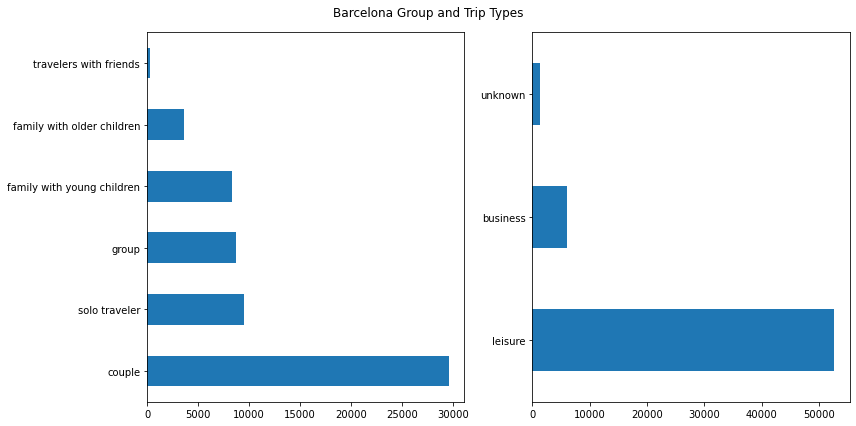

In [9]:
plt.figure(figsize=(12,6))
plt.suptitle('Barcelona Group and Trip Types')
plt.subplot(121)
barza_df.group_type.value_counts().plot.barh()

plt.subplot(122)
barza_df.trip_type.value_counts().plot.barh()

plt.tight_layout()


### Takeaways: Most guests at Barcelona hotels are couples on leisure trips

In [13]:
# Impute a '1' for nulls in nights stayed column
barza_df.nights_stayed = barza_df.nights_stayed.fillna(1)
milan_df.nights_stayed = milan_df.nights_stayed.fillna(1)
barza_df.nights_stayed = barza_df.nights_stayed.astype('float64')
milan_df.nights_stayed = milan_df.nights_stayed.astype('float64')

In [14]:
barza_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60149 entries, 2015-08-04 to 2017-08-03
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   month_name                                  60149 non-null  object 
 1   month                                       60149 non-null  int64  
 2   year                                        60149 non-null  int64  
 3   day_name                                    60149 non-null  object 
 4   day                                         60149 non-null  int64  
 5   quarter                                     60149 non-null  int64  
 6   hotel_name                                  60149 non-null  object 
 7   street                                      60149 non-null  object 
 8   city                                        60149 non-null  object 
 9   zip_code                                    60149 non-null  object

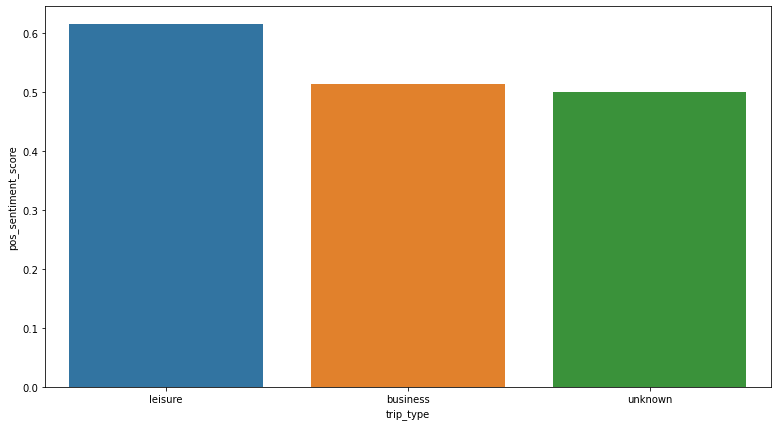

<AxesSubplot:xlabel='group_type', ylabel='pos_sentiment_score'>

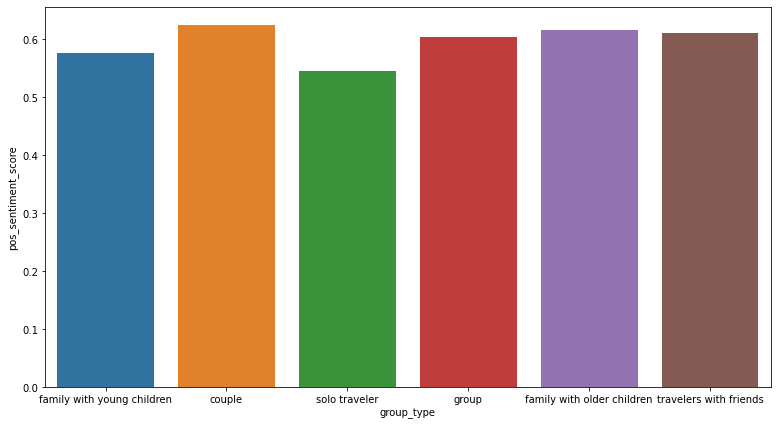

In [16]:
# Distribution of nights stayed
#plt.figure(figsize=(13,7))
#sns.displot(data=barza_df, x='nights_stayed')
#plt.show()

#Compare trip type and positive sentiment score

plt.figure(figsize=(13,7))
#plt.ylim(-1,1)
sns.barplot(data=barza_df, x= 'trip_type', y= 'pos_sentiment_score', ci=False)
plt.show()

#Compare group type and positive sentiment score
plt.figure(figsize=(13,7))
#plt.ylim(-1,1)
sns.barplot(data=barza_df, x= 'group_type', y= 'pos_sentiment_score', ci= False)

### Takeaways: Meaningful trends emerge with trip type and group type rel to positive sentiment score: Solo travelers, followed by families with young children show lower positive sentiment scores; and, guests on leisure trips show higher sentiment scores than those who are not on leisure trips. 

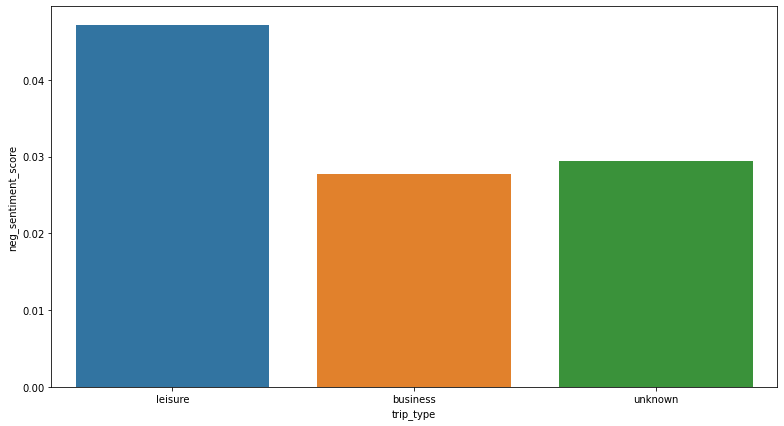

<AxesSubplot:xlabel='group_type', ylabel='neg_sentiment_score'>

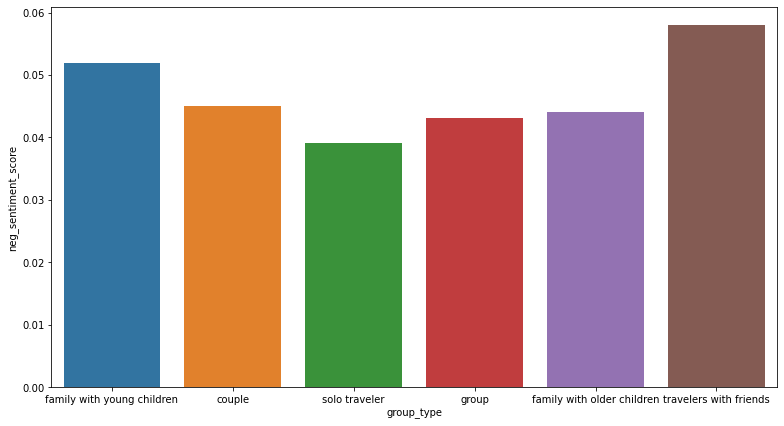

In [17]:
# Show tags (trip and group type) against negative sentiment score
plt.figure(figsize=(13,7))
#plt.ylim(-1,1)
sns.barplot(data=barza_df, x= 'trip_type', y= 'neg_sentiment_score', ci=False)
plt.show()

plt.figure(figsize=(13,7))
#plt.ylim(-1,1)
sns.barplot(data=barza_df, x= 'group_type', y= 'neg_sentiment_score', ci= False)

### Takeaways: Negative sentiment scores for both trip and group type are rather neutral (sentiment scores range [-1, 1])

In [12]:
barza_df.trip_type.value_counts()

leisure    52719
unknown     7430
Name: trip_type, dtype: int64

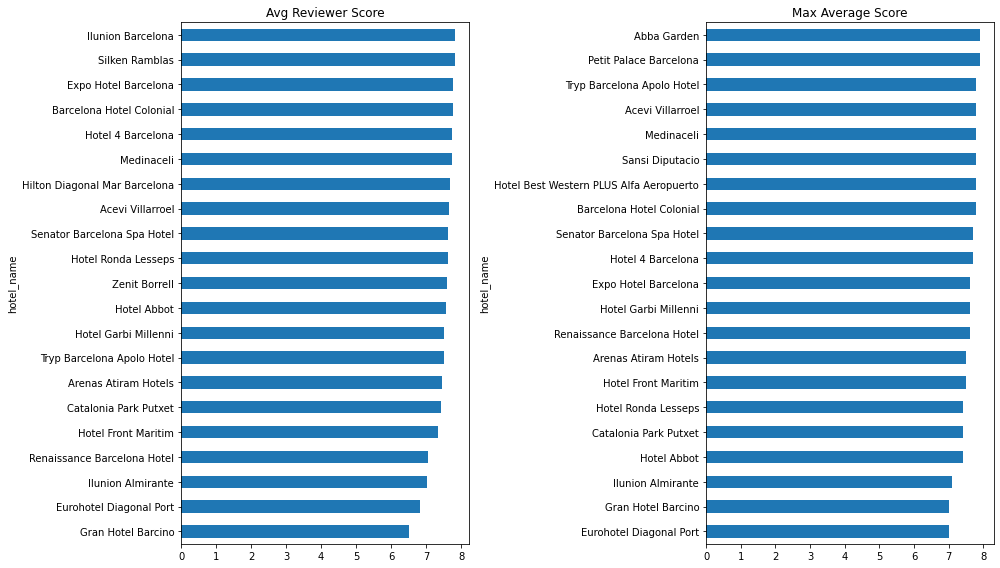

In [16]:
plt.figure(figsize=(14,8))
plt.subplot(121)
barza_df.groupby('hotel_name').reviewer_score.agg('mean').sort_values().head(21).plot.barh()
plt.title('Avg Reviewer Score')

plt.subplot(122)
barza_df.groupby('hotel_name').average_score.agg('max').sort_values().head(21).plot.barh()
plt.title('Max Average Score')

plt.tight_layout()



In [17]:
len(barza_df.hotel_name.value_counts())

211

In [25]:
df.columns

Index(['additional_number_of_scoring', 'average_score', 'hotel_name',
       'reviewer_nationality', 'negative_review',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'positive_review', 'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'trip_type', 'nights_stayed',
       'group_type', 'month', 'year', 'day_name', 'day', 'quarter',
       'negative_unique_word_count', 'positive_unique_word_count', 'street',
       'city', 'zip_code', 'country', 'positive_clean_review',
       'negative_clean_review', 'positive_stem', 'negative_stem',
       'positive_lemma', 'negative_lemma', 'pos_sentiment_score',
       'neg_sentiment_score', 'pos_lem_sentiment_score',
       'neg_lem_sentiment_score'],
      dtype='object')

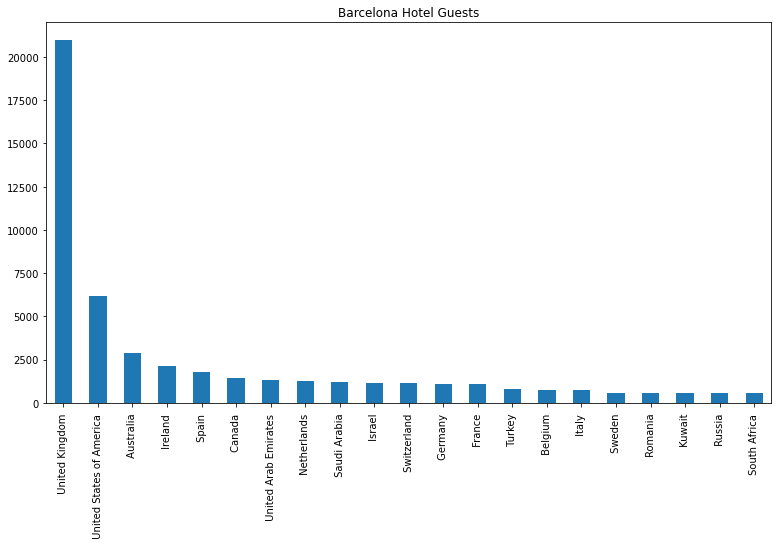

Text(0.5, 1.0, 'Milan Hotel Guests')

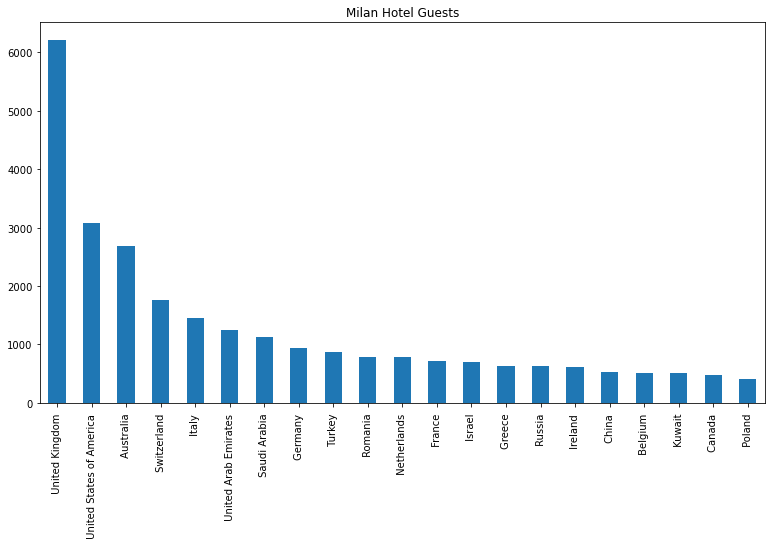

In [28]:
plt.figure(figsize=(13,7))
barza_df.reviewer_nationality.value_counts().head(21).sort_values(ascending=False).plot.bar()
plt.title('Barcelona Hotel Guests')
plt.show()

plt.figure(figsize=(13,7))
milan_df.reviewer_nationality.value_counts().head(21).sort_values(ascending=False).plot.bar()
plt.title('Milan Hotel Guests')

### Takeaway: The vast majority of hotel guests in Barcelona are from the UK, with Americans a distant second (3-to-1). In Milan, UK is still the majority of hotel guests, but the ratio between it and Americans, again in 2nd place, is 2-to-1.

Does a reviewer's nationality affect the score given?

In [29]:
# Viewer reviewer score grouped by reviewer nationality
barza_df.groupby('reviewer_nationality').reviewer_score.agg(['min', 'max', 'mean']).sort_values('mean', ascending=False).T

reviewer_nationality,Saint Martin,Suriname,Nicaragua,Cambodia,Somalia,Kosovo,Dominica,Yemen,Congo,Saint Kitts and Nevis,British Virgin Islands,Reunion,Vanuatu,Guam,Liechtenstein,Kyrgyzstan,Dominican Republic,St Maarten,Ghana,Cura ao,Barbados,Uruguay,Bahamas,Bermuda,United States of America,Trinidad and Tobago,Mongolia,New Zealand,Moldova,Honduras,Mauritius,Ecuador,Panama,Puerto Rico,Israel,Saint Lucia,Australia,Zimbabwe,Isle of Man,New Caledonia,Cayman Islands,Tajikistan,Colombia,China,United Kingdom,Peru,Botswana,Cyprus,Canada,Philippines,Chile,Kenya,Cameroon,Ireland,Tunisia,South Korea,Argentina,Macedonia,Jersey,Bulgaria,Indonesia,South Africa,Brazil,Hungary,Morocco,Guatemala,Costa Rica,Iraq,Abkhazia Georgia,Malta,Venezuela,Iceland,Guernsey,Estonia,Gibraltar,Taiwan,Nigeria,Ukraine,Belarus,Slovakia,Oman,Serbia,Libya,Singapore,Greece,Kazakhstan,Slovenia,Myanmar,Zambia,Belgium,Russia,U S Virgin Islands,Spain,Poland,Czech Republic,Malaysia,Norway,Lithuania,Sudan,Lebanon,Aruba,Egypt,Thailand,Netherlands,Austria,Italy,Tanzania,Japan,Finland,Sri Lanka,Albania,United States Minor Outlying Islands,Palestinian Territory,Brunei,Romania,Switzerland,Kuwait,,Germany,Hong Kong,Croatia,Sweden,France,Turkey,Malawi,United Arab Emirates,Armenia,India,Syria,Bahrain,Denmark,Saudi Arabia,Luxembourg,Uzbekistan,Latvia,Qatar,Mexico,Angola,Vietnam,Bosnia and Herzegovina,Pakistan,Portugal,Faroe Islands,Iran,Georgia,Macau,Monaco,Namibia,Rwanda,Swaziland,Fiji,Azerbaijan,Jordan,El Salvador,Algeria,Democratic Republic of the Congo,Senegal,Antigua Barbuda,Uganda,Bangladesh,Andorra,Mozambique,Turks Caicos Islands,Ivory Coast,Saint Barts,Lesotho,Guyana,Jamaica,Montenegro,Seychelles,Maldives,Afghanistan,Bolivia,Samoa,Mauritania,Ethiopia,Northern Mariana Islands,Cook Islands,Haiti,Nepal
min,10.0,10.0,10.0,10.0,10.0,10.0,9.2,9.2,9.6,9.6,9.6,9.6,9.2,9.2,9.4,7.9,7.500000,9.2,5.400000,7.500000,8.30,7.50,7.50,6.700,2.500000,7.100000,7.5,2.50000,7.100000,6.30,5.800000,6.300000,6.300000,2.50000,2.500000,8.8,2.500000,8.300000,6.300000,7.50,7.50,7.50,2.90000,2.50000,2.500000,5.000000,6.7,4.200000,2.500000,3.800000,3.800,5.800000,7.100000,2.500000,5.000000,2.500000,4.200000,3.300000,5.400000,2.90000,4.200000,2.500000,3.300000,2.500000,4.600000,4.200000,5.400,3.800000,4.200,3.300000,3.800000,2.500000,3.800,3.800000,4.200000,3.300000,2.500000,2.500000,4.600,5.800000,3.300000,2.500000,5.000000,2.50000,2.900000,3.800000,3.30000,4.20,7.10,2.900000,2.500000,6.700000,2.500000,2.500000,3.300000,3.300000,2.500000,2.500000,2.900000,2.500000,7.50,2.500000,3.800000,2.500000,2.900000,2.500000,7.10,2.500,2.500000,2.50,3.800000,5.000000,5.800000,7.90,2.500000,2.500000,2.500000,4.600000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,6.30,2.500000,4.200000,2.500000,3.8,2.500000,2.500000,2.500000,2.500000,7.100000,2.500000,2.500000,2.900000,5.80,3.30000,4.600000,3.300000,2.500000,6.700000,2.500000,2.5000,4.20,4.200000,7.9,7.9,7.5,7.9,3.800000,2.500000,5.400000,2.500000,5.800000,6.70,7.5,5.4,3.800,3.800000,4.200000,5.000000,6.30,7.5,7.5,7.5,5.40,2.90000,5.800,2.50,5.4,3.800,6.7,6.3,2.50,5.8,5.0,4.6,3.8
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.6,9.6,9.6,9.6,10.0,10.0,9.4,10.0,10.000000,9.2,10.000000,10.000000,10.00,10.00,10.00,10.000,10.000000,10.000000,10.0,10.00000,10.000000,10.00,10.000000,10.000000,10.000000,10.00000,10.000000,8.8,10.000000,9.200000,10.000000,10.00,10.00,10.00,10.00000,10.00000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.00,9.20,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00,10.000000,10.000000,10.000000,10.000000,10.000000,9.60,1

In [33]:
barza_df.reviewer_score.value_counts()

10.0    15013
9.6      8797
9.2      7287
8.8      5510
8.3      4800
7.9      3782
7.5      3689
7.1      2513
6.7      1866
6.3      1496
5.8      1189
5.4       917
5.0       821
4.6       563
4.2       479
3.8       367
3.3       272
2.5       207
2.9       144
9.5        87
9.0        80
8.0        60
8.5        56
6.5        38
7.0        29
6.0        29
5.5        14
9.4        12
4.5        11
3.5         6
8.1         4
4.4         3
5.6         3
6.9         2
4.0         2
3.0         1
Name: reviewer_score, dtype: int64

Observation: It appears that a probably not insignificant number of countries are represented by two or less guests, given the above aggregation of minimum, maximum, mean, and median reviewer scores.

In [27]:
print(barza_df.groupby('reviewer_nationality').total_number_of_reviews.count())

print(len(barza_df.groupby('reviewer_nationality').total_number_of_reviews.count()))

reviewer_nationality
                                             57
 Abkhazia Georgia                            25
 Afghanistan                                  3
 Albania                                     30
 Algeria                                     32
 Andorra                                     38
 Angola                                      10
 Antigua Barbuda                              2
 Argentina                                   85
 Armenia                                     18
 Aruba                                        5
 Australia                                 2907
 Austria                                    293
 Azerbaijan                                  31
 Bahamas                                      6
 Bahrain                                    183
 Bangladesh                                  20
 Barbados                                     4
 Belarus                                     40
 Belgium                                    750
 Bermuda           

$H_0:$ There is no relationship between the total number of reviews and average review score.

$H_a:$ There is a relationship between the total number of reviews and average review score.

The correlation coefficient for this test was -0.321 and its p-value is 0.000000000000.


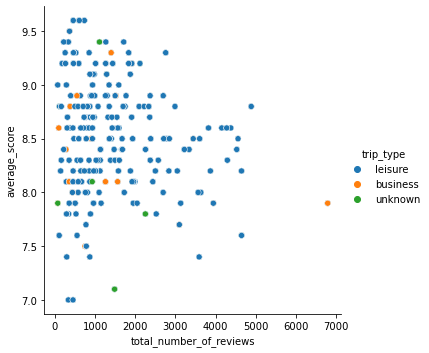

In [21]:
alpha = .05
r_coeff, pval = stats.pearsonr(x=barza_df.total_number_of_reviews, y=barza_df.average_score)
print(f'The correlation coefficient for this test was {r_coeff:.3f} and its p-value is {pval:.12f}.')

sns.relplot(data=barza_df, x='total_number_of_reviews', y='average_score', hue='trip_type')

### Correlation testing for a link between total number of reviews and average scores found a statistically significant, weak, negative correlation between the variables.

$H_0:$ There is no relationship between the number of nights stayed and average review score.

$H_a:$ There is a relationship between the number of nights stayed and average review score.

The correlation coefficient for this test was 0.009 and its p-value is 0.023167983472.


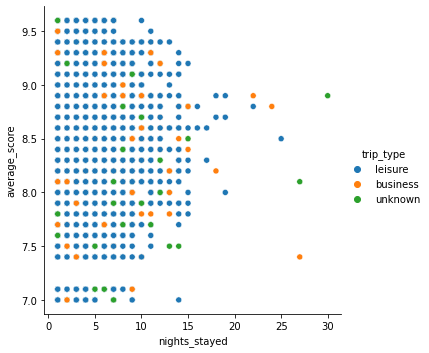

In [22]:
r_coeff, pval = stats.pearsonr(x=barza_df[barza_df.nights_stayed.notna()].nights_stayed, y=barza_df[barza_df.nights_stayed.notna()].average_score)
print(f'The correlation coefficient for this test was {r_coeff:.3f} and its p-value is {pval:.12f}.')

sns.relplot(data=barza_df, x='nights_stayed', y='average_score', hue='trip_type')

### There is virtually no correlation (0.009) between nights stayed and average score.